### VAR (vector autoregression) models
- **In SARIMAX models forecast variable influenced by exogenous(input) variable but not vice-versa**
- **When VAR models are great if forecast variable influenced by exogenous(input) variable and vice-versa**
- General steps for VAR models:
 - examine the data
 - visualize the data
 - test for stationarity
 - build a model on training data
 - predict on test data
 - forecast for the future

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [3]:
df1 = pd.read_csv('data/M2SLMoneyStock.csv', index_col= 0, parse_dates= True)
df2 = pd.read_csv('data/PCEPersonalSpending.csv', index_col= 0, parse_dates= True)

In [4]:
df1.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [5]:
df2.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [7]:
print(df1.index)
print(df2.index)

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)
DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)


In [8]:
df1.index.freq = 'MS'
df2.index.freq = 'MS'

In [9]:
print(df1.index)
print(df2.index)

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='Date', length=252, freq='MS')
DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='Date', length=252, freq='MS')


In [10]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

In [11]:
# combine the dataframe
data = df1.join(df2)
data.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [12]:
data.shape

(252, 2)

In [13]:
data.tail()

,Money,Spending
Date,,
2015-08-01,12096.8,12394.0
2015-09-01,12153.8,12392.8
2015-10-01,12187.7,12416.1
2015-11-01,12277.4,12450.1
2015-12-01,12335.9,12469.1


In [14]:
data.isna().sum()

Money       0
Spending    0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 1995-01-01 to 2015-12-01
Freq: MS
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Money     252 non-null    float64
 1   Spending  252 non-null    float64
dtypes: float64(2)
memory usage: 15.9 KB


In [18]:
data.describe()

,Money,Spending
count,252.000000,252.000000
mean,6978.151190,8562.311905
std,2554.325115,2231.933352
min,3489.900000,4850.800000
25%,4732.875000,6682.125000
50%,6507.400000,8777.150000
75%,8699.700000,10262.925000
max,12335.900000,12469.100000


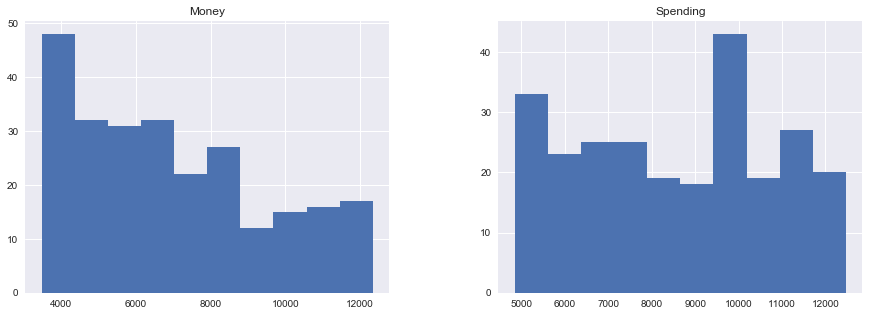

In [24]:
# data distribution
data.hist(figsize = (15,5))
plt.show()

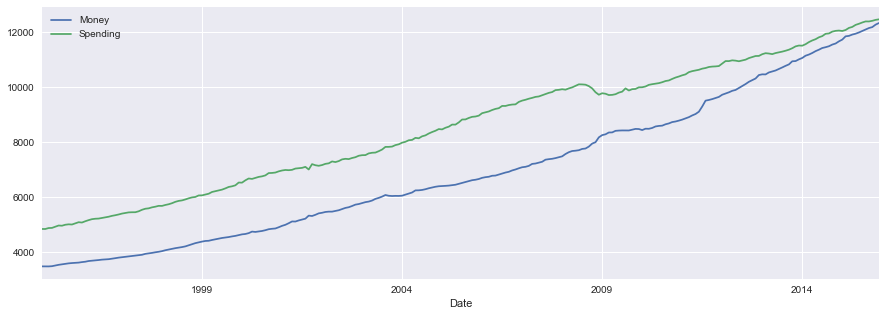

In [26]:
data.plot(figsize = (15,5),legend = True)
plt.show()

In [27]:
# test for stationarity
# augmented dickey-fuller test (adf)

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [28]:
adf_test(data['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic        4.239022
p-value                   1.000000
# lags used               4.000000
# observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [29]:
adf_test(data['Spending'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.149796
p-value                   0.969301
# lags used               3.000000
# observations          248.000000
critical value (1%)      -3.456996
critical value (5%)      -2.873266
critical value (10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [30]:
data_transfomed = data.diff()
data_transfomed.head()

,Money,Spending
Date,,
1995-01-01,NaN,NaN
1995-02-01,-2.5,-0.4
1995-03-01,1.2,34.6
1995-04-01,8.1,4.8
1995-05-01,25.0,42.9


In [31]:
adf_test(data_transfomed['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -2.057404
p-value                   0.261984
# lags used              15.000000
# observations          235.000000
critical value (1%)      -3.458487
critical value (5%)      -2.873919
critical value (10%)     -2.573367
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [32]:
adf_test(data_transfomed['Spending'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.226974e+00
p-value                 2.041027e-10
# lags used             2.000000e+00
# observations          2.480000e+02
critical value (1%)    -3.456996e+00
critical value (5%)    -2.873266e+00
critical value (10%)   -2.573019e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [33]:
# seems to be "money" column is not yet stationary
data_transfomed = data_transfomed.diff().dropna()
data_transfomed.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [34]:
adf_test(data_transfomed['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.077471e+00
p-value                 4.760675e-10
# lags used             1.400000e+01
# observations          2.350000e+02
critical value (1%)    -3.458487e+00
critical value (5%)    -2.873919e+00
critical value (10%)   -2.573367e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [35]:
adf_test(data_transfomed['Spending'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -8.760145e+00
p-value                 2.687900e-14
# lags used             8.000000e+00
# observations          2.410000e+02
critical value (1%)    -3.457779e+00
critical value (5%)    -2.873609e+00
critical value (10%)   -2.573202e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [36]:
# train and test split
nobs = 12 # number of observations
train = data_transfomed[ :-nobs]
test = data_transfomed[-nobs: ]

In [37]:
print(train.shape)
print(test.shape)

(238, 2)
(12, 2)


In [38]:
# gridsearch for order of VAR - p component
# choose low value of AIC
model  = VAR(train)

for p in range(8):
    
    results = model.fit(p)
    print('order {}'.format(p))
    print('aic value : {}'.format(results.aic))
    print('\n')

order 0
aic value : 14.74710921809045


order 1
aic value : 14.178610495220896


order 2
aic value : 13.955189367163705


order 3
aic value : 13.849518291541038


order 4
aic value : 13.827950574458283


order 5
aic value : 13.78730034460964


order 6
aic value : 13.799076756885809


order 7
aic value : 13.797638727913972




In [39]:
results = model.fit(5) # choose order = 5 where AIC is low
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 23, Jul, 2020
Time:                     12:22:13
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

In [40]:
test

,Money,Spending
Date,,
2015-01-01,-15.5,-26.6
2015-02-01,56.1,52.4
2015-03-01,-102.8,39.5
2015-04-01,30.9,-40.4
2015-05-01,-15.8,38.8
2015-06-01,14.0,-34.1
2015-07-01,6.7,6.9
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8


In [41]:
# grab 5 lagged values before test starts
# it should be a numpy array
lagged_values = train.values[-5:]
lagged_values

array([[-31.9,  40.3],
       [  5.6, -70.7],
       [ 25.5,  52.5],
       [-21.3, -37.2],
       [ 39.5, -17.8]])

In [42]:
results.forecast(y = lagged_values, steps = 12)

array([[-16.99527634,  36.14982003],
       [ -3.17403756, -11.45029844],
       [ -0.377725  ,  -6.68496939],
       [ -2.60223305,   5.47945777],
       [  4.228557  ,  -2.44336505],
       [  1.55939341,   0.38763902],
       [ -0.99841027,   3.88368011],
       [  0.36451042,  -2.3561014 ],
       [ -1.21062726,  -1.22414652],
       [  0.22587712,   0.786927  ],
       [  1.33893884,   0.18097449],
       [ -0.21858453,   0.21275046]])

In [43]:
z = results.forecast(y = lagged_values, steps = 12)

In [44]:
idx = pd.date_range('2015-01-01', periods= 12, freq= 'MS') # give test data starting date
idx

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [45]:
df_forecast = pd.DataFrame(data = z, index= idx, columns= ['Money_2d', 'Spending_2d'])
df_forecast

,Money_2d,Spending_2d
2015-01-01,-16.995276,36.149820
2015-02-01,-3.174038,-11.450298
2015-03-01,-0.377725,-6.684969
2015-04-01,-2.602233,5.479458
2015-05-01,4.228557,-2.443365
2015-06-01,1.559393,0.387639
2015-07-01,-0.998410,3.883680
2015-08-01,0.364510,-2.356101
2015-09-01,-1.210627,-1.224147
2015-10-01,0.225877,0.786927


### Invert the Transformation
- Remember that the forecasted values represent second-order differences. To compare them to the original data we have to roll back each difference. To roll back a first-order difference we take the most recent value on the training side of the original series, and add it to a cumulative sum of forecasted values. When working with second-order differences we first must perform this operation on the most recent first-order difference.

- Here we'll use the nobs variable we defined during the train/test/split step.

In [47]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Money1d'] = (data['Money'].iloc[-nobs-1]-data['Money'].iloc[-nobs-2]) + df_forecast['Money_2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = data['Money'].iloc[-nobs-1] + df_forecast['Money1d'].cumsum()

In [48]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spending1d'] = (data['Spending'].iloc[-nobs-1]-data['Spending'].iloc[-nobs-2]) + df_forecast['Spending_2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = data['Spending'].iloc[-nobs-1] + df_forecast['Spending1d'].cumsum()

In [49]:
df_forecast

,Money_2d,Spending_2d,Money1d,MoneyForecast,Spending1d,SpendingForecast
2015-01-01,-16.995276,36.149820,61.604724,11731.704724,46.749820,12108.749820
2015-02-01,-3.174038,-11.450298,58.430686,11790.135410,35.299522,12144.049342
2015-03-01,-0.377725,-6.684969,58.052961,11848.188371,28.614552,12172.663894
2015-04-01,-2.602233,5.479458,55.450728,11903.639099,34.094010,12206.757904
2015-05-01,4.228557,-2.443365,59.679285,11963.318384,31.650645,12238.408549
2015-06-01,1.559393,0.387639,61.238678,12024.557062,32.038284,12270.446833
2015-07-01,-0.998410,3.883680,60.240268,12084.797331,35.921964,12306.368797
2015-08-01,0.364510,-2.356101,60.604779,12145.402109,33.565863,12339.934659
2015-09-01,-1.210627,-1.224147,59.394151,12204.796261,32.341716,12372.276375
2015-10-01,0.225877,0.786927,59.620028,12264.416289,33.128643,12405.405019


In [55]:
list(test.index)

[Timestamp('2015-01-01 00:00:00', freq='MS'),
 Timestamp('2015-02-01 00:00:00', freq='MS'),
 Timestamp('2015-03-01 00:00:00', freq='MS'),
 Timestamp('2015-04-01 00:00:00', freq='MS'),
 Timestamp('2015-05-01 00:00:00', freq='MS'),
 Timestamp('2015-06-01 00:00:00', freq='MS'),
 Timestamp('2015-07-01 00:00:00', freq='MS'),
 Timestamp('2015-08-01 00:00:00', freq='MS'),
 Timestamp('2015-09-01 00:00:00', freq='MS'),
 Timestamp('2015-10-01 00:00:00', freq='MS'),
 Timestamp('2015-11-01 00:00:00', freq='MS'),
 Timestamp('2015-12-01 00:00:00', freq='MS')]

In [59]:
# test data
test_range = data[-nobs:]
test_range

,Money,Spending
Date,,
2015-01-01,11733.2,12046.0
2015-02-01,11852.4,12082.4
2015-03-01,11868.8,12158.3
2015-04-01,11916.1,12193.8
2015-05-01,11947.6,12268.1
2015-06-01,11993.1,12308.3
2015-07-01,12045.3,12355.4
2015-08-01,12096.8,12394.0
2015-09-01,12153.8,12392.8


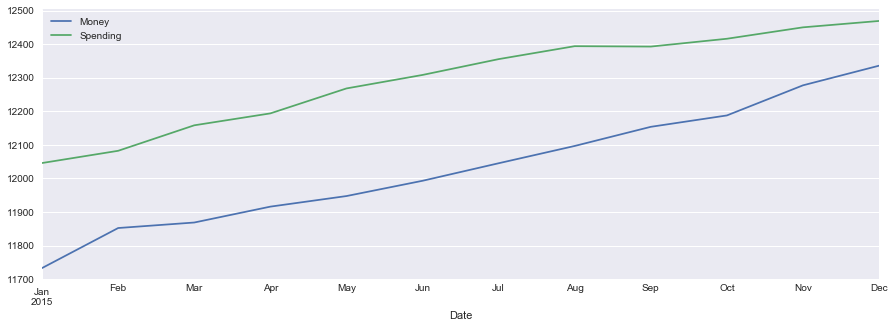

In [60]:
# original test data
test_range.plot(figsize = (15,5))
plt.show()

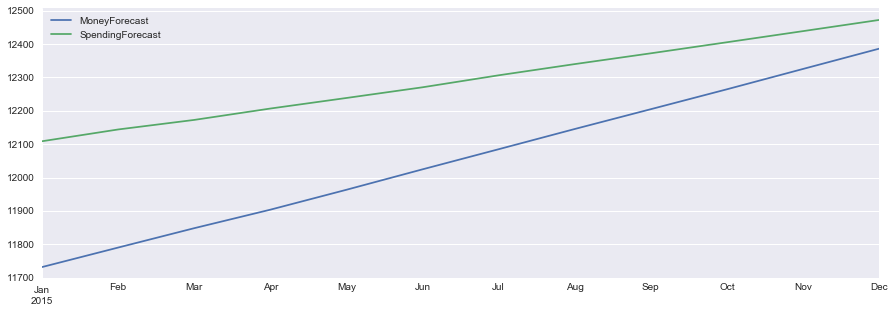

In [62]:
# forcasted results
df_forecast[['MoneyForecast','SpendingForecast']].plot(figsize = (15,5))
plt.show()

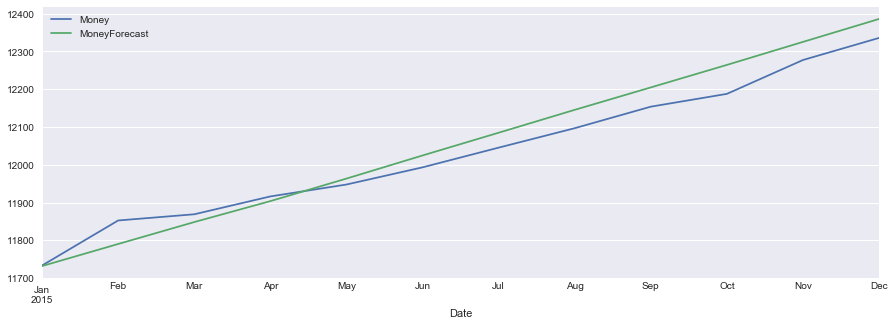

In [63]:
test_range['Money'].plot(figsize = (15,5), legend = True)
df_forecast['MoneyForecast'].plot(legend = True)
plt.show()

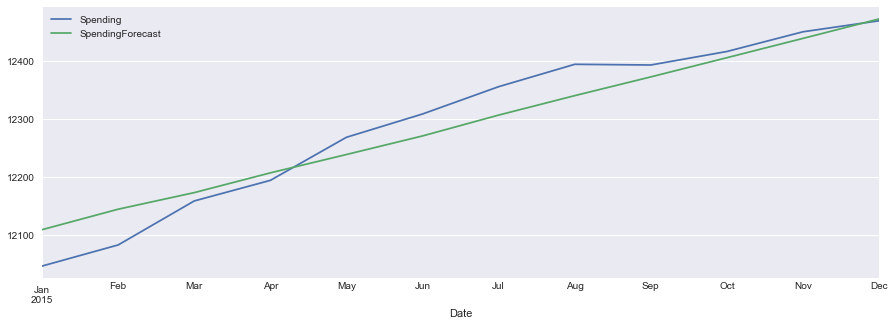

In [64]:
test_range['Spending'].plot(figsize = (15,5), legend = True)
df_forecast['SpendingForecast'].plot(legend = True)
plt.show()

In [65]:
# error metrics
print(rmse(test_range['Money'], df_forecast['MoneyForecast']))
print(rmse(test_range['Spending'], df_forecast['SpendingForecast']))

43.71049653558938
37.00117516940808
